# Import Libraries 

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math

## Distance formula and Trilateration Impletentation to Find A Common Intersection Point

In [9]:
# Function to calculate Euclidean distance between two points
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Function to calculate xy-coordinates from distances
def calculate_xy_from_distances(distances, beacon_positions):
    # Calculate the coefficients P, Q, R, S, T, U based on the beacon positions and distances
    P = 2*(beacon_positions[1][0] - beacon_positions[0][0])
    Q = 2*(beacon_positions[1][1] - beacon_positions[0][1])
    R = distances[0]**2 - distances[1]**2 - beacon_positions[0][0]**2 + beacon_positions[1][0]**2 - beacon_positions[0][1]**2 + beacon_positions[1][1]**2

    S = 2*(beacon_positions[2][0] - beacon_positions[1][0])
    T = 2*(beacon_positions[2][1] - beacon_positions[1][1])
    U = distances[1]**2 - distances[2]**2 - beacon_positions[1][0]**2 + beacon_positions[2][0]**2 - beacon_positions[1][1]**2 + beacon_positions[2][1]**2

    # Calculate the x and y coordinates
    x = (R*T - U*Q) / (P*T - Q*S)
    y = (R*S - P*U) / (Q*S - P*T)
    return x, y

Updated data with distances saved to: TL-EXP-2024-06-04/filtered_with_distances\EMA2233M10237_with_distances.csv


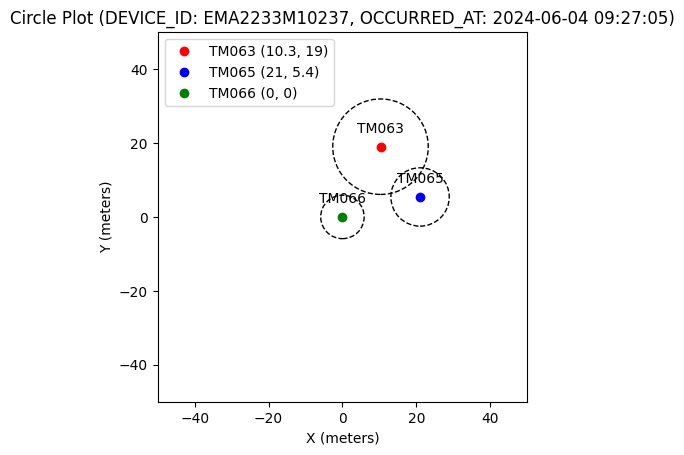

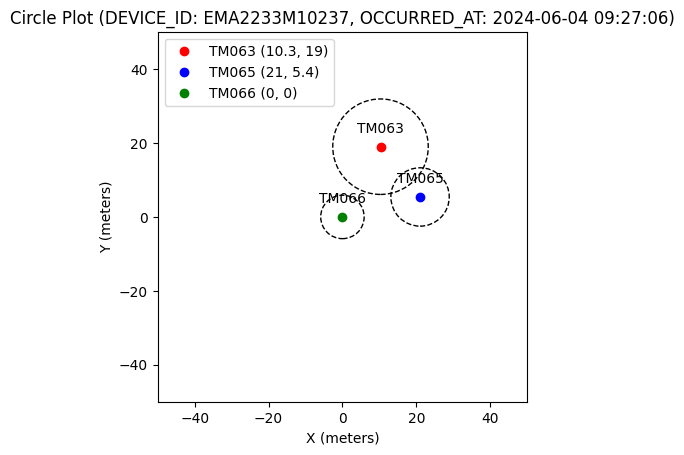

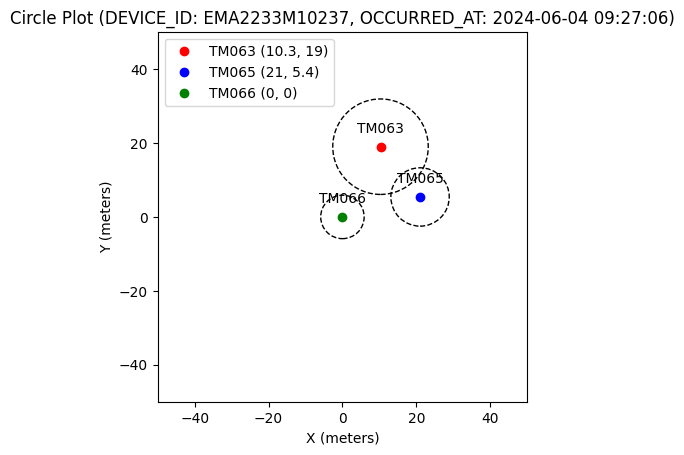

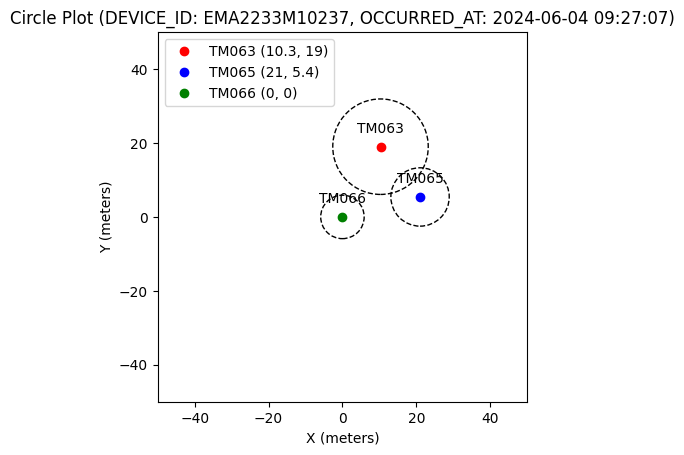

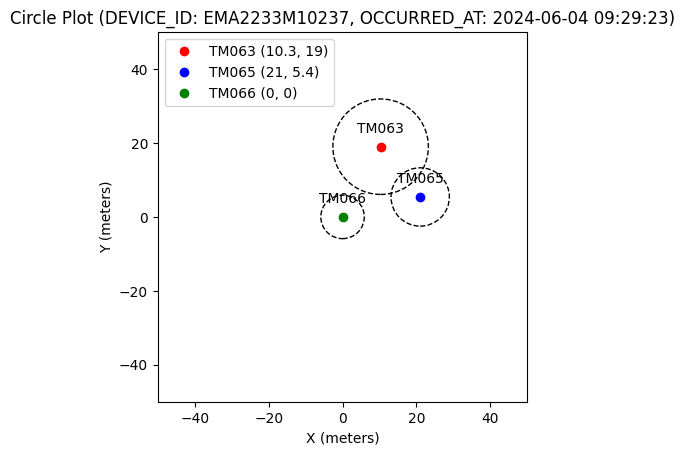

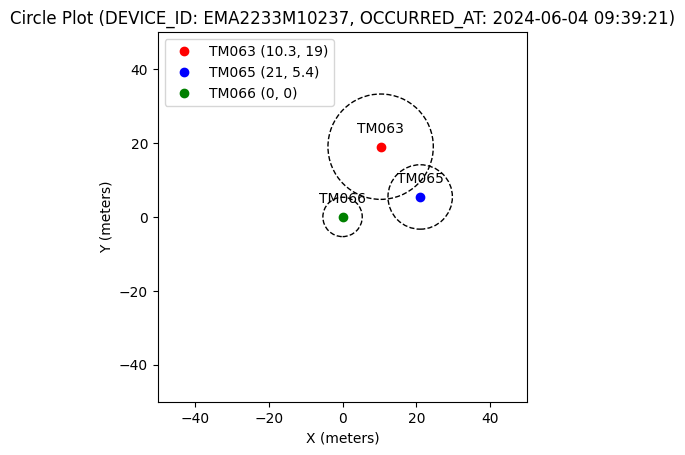

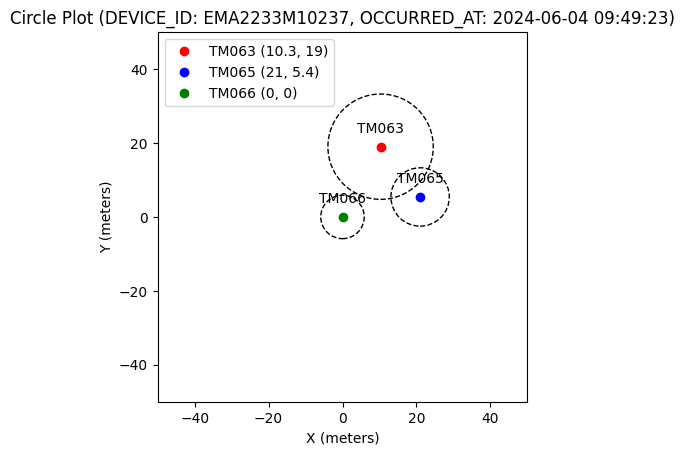

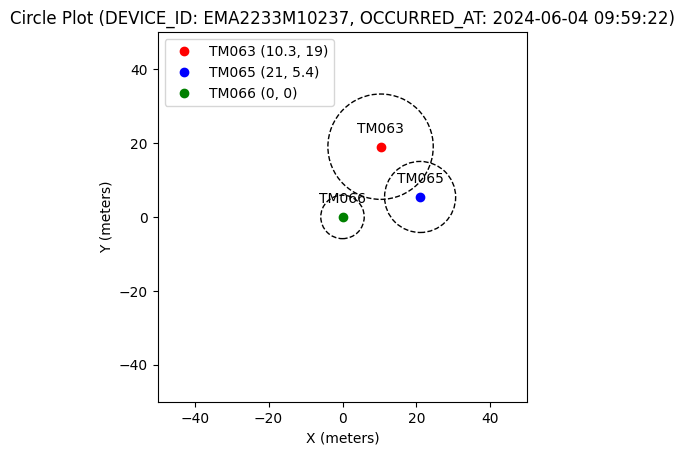

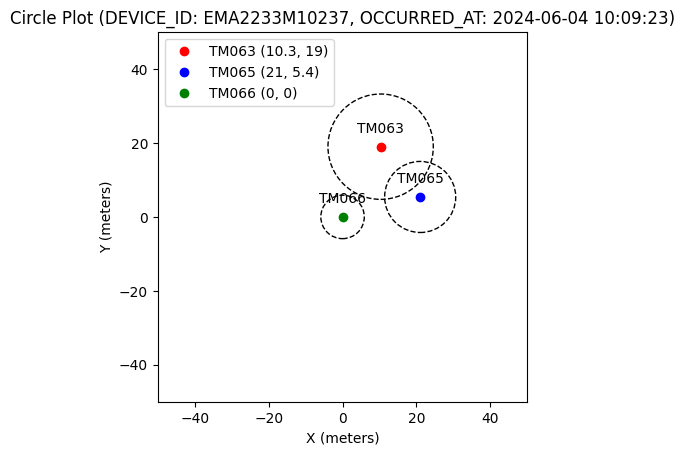

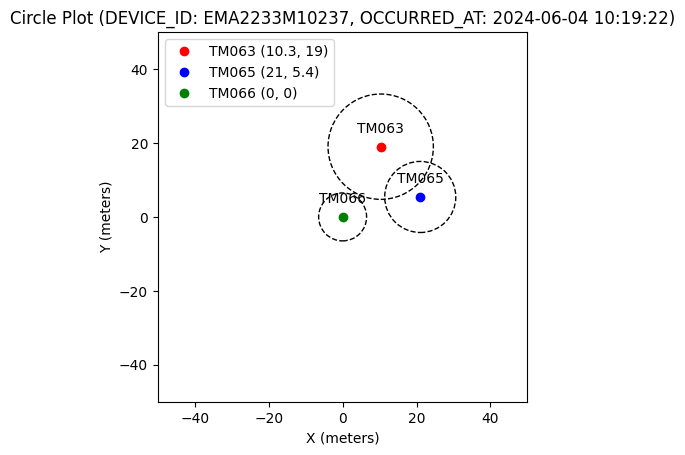

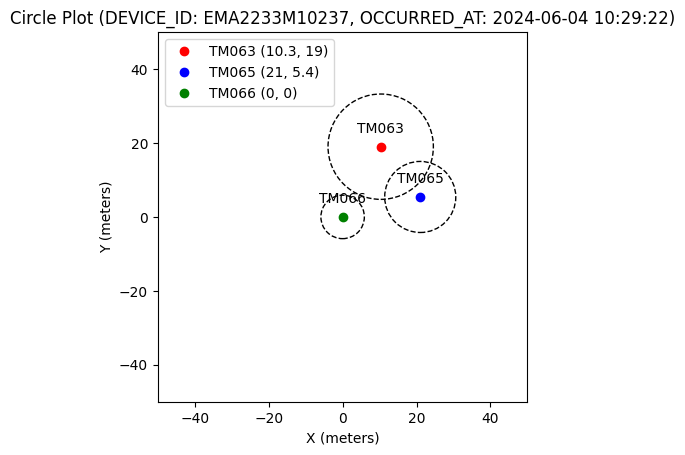

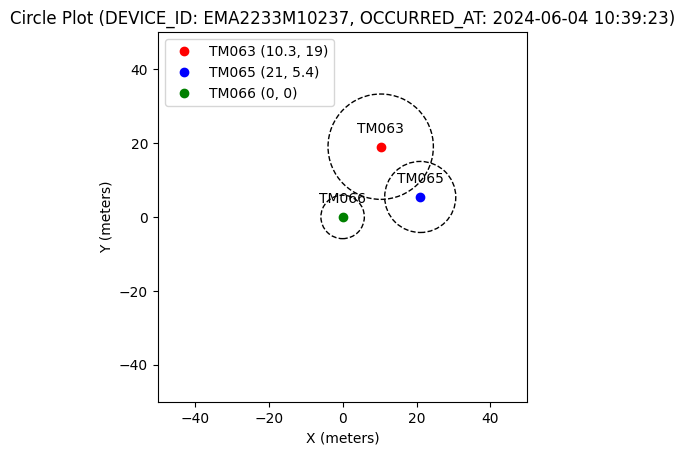

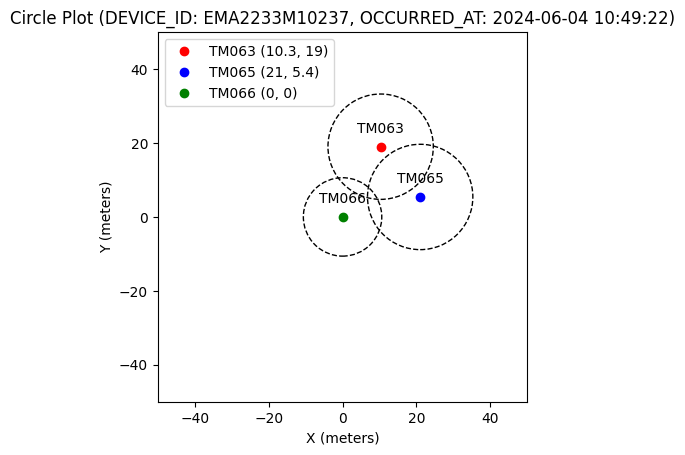

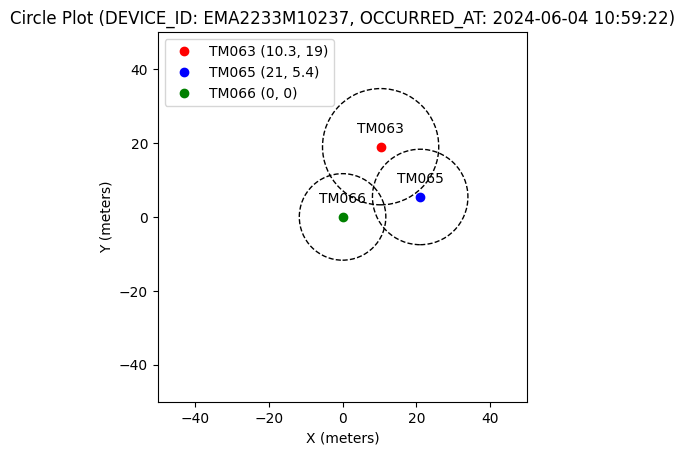

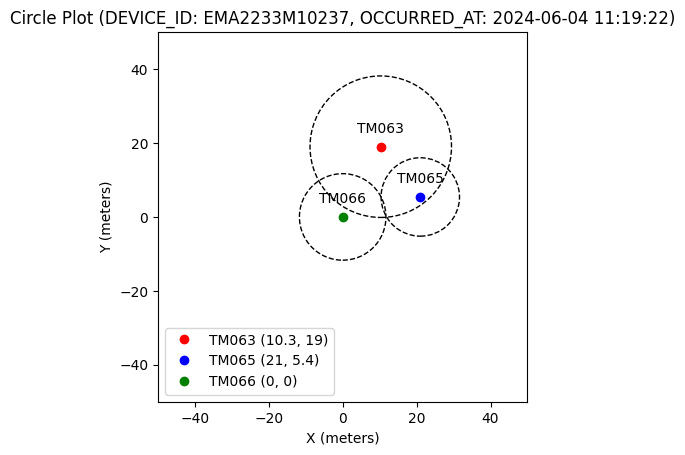

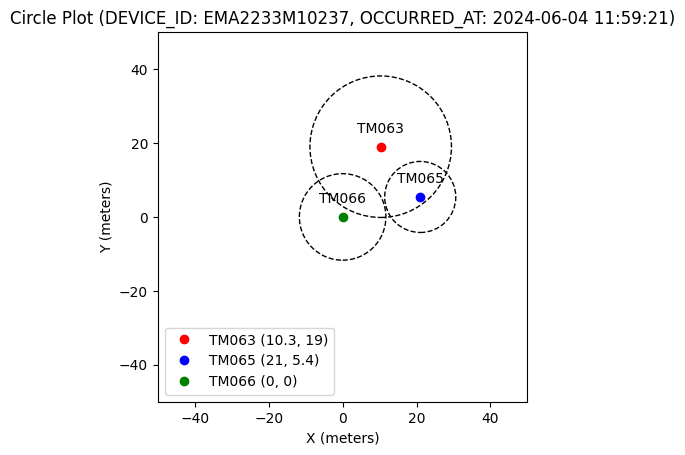

In [13]:

# Function to convert feet to meters
def meter(x_feet, y_feet):
    x_meters = x_feet
    y_meters = y_feet
    return x_meters, y_meters
# distance Map
def calculate_distance(rssi):
    n=2.34
    P = -30  # dBm  RSSI at 1 m distance
    distance = 10**((P - float(rssi)) / (10 * n))
    return distance

# n=2.34 for connected sensor and terminal
# n=4 for the remaining two terminal

# Read the CSV file with RSSI data
csv_file_path = "data/output_EMA2233M10237_with_RSSI.csv"
df = pd.read_csv(csv_file_path)
df = df.dropna()
# Extract DEVICE_ID from the DataFrame
device_id = df['DEVICE_ID'].iloc[0]

# Extract RSSI values for TM066, TM065, and TM063
df['TM066_RSSI'] = df['RSSI'].str.extract(r'TM066,(-?\d+)').astype(float)
df['TM065_RSSI'] = df['RSSI'].str.extract(r'TM065,(-?\d+)').astype(float)
df['TM063_RSSI'] = df['RSSI'].str.extract(r'TM063,(-?\d+)').astype(float)

# Calculate distance for TM066, TM065, and TM063
df['TM066_Distance'] = df['TM066_RSSI'].apply(calculate_distance)
df['TM065_Distance'] = df['TM065_RSSI'].apply(calculate_distance)
df['TM063_Distance'] = df['TM063_RSSI'].apply(calculate_distance)

# Create a new folder to save the file
output_folder_path = "TL-EXP-2024-06-04/filtered_with_distances"
os.makedirs(output_folder_path, exist_ok=True)

# Define the output file path with dynamic file name
output_file_path = os.path.join(output_folder_path, f"{device_id}_with_distances.csv")

# Save the DataFrame to the new CSV file
df.to_csv(output_file_path, index=False)

print(f"Updated data with distances saved to: {output_file_path}")

# Coordinates for TM063, TM065, and TM066 in feet
TM_coordinates_feet = {'TM063': (10.3, 19), 'TM065': (21, 5.4), 'TM066': (0, 0)}

# Convert coordinates from feet to meters
TM_coordinates_meters = {tm: meter(x, y) for tm, (x, y) in TM_coordinates_feet.items()}

# Iterate through each row and create individual plots
for idx, row in df.iterrows():
    # Create a new plot for each row
    fig, ax = plt.subplots()

    # Plot TM063
    ax.plot(*TM_coordinates_meters['TM063'], 'ro', label=f"TM063 {TM_coordinates_meters['TM063']}")

    # Plot TM065
    ax.plot(*TM_coordinates_meters['TM065'], 'bo', label=f"TM065 {TM_coordinates_meters['TM065']}")

    # Plot TM066
    ax.plot(*TM_coordinates_meters['TM066'], 'go', label=f"TM066 {TM_coordinates_meters['TM066']}")

    # Plot circles with calculated distances
    for tm, (x, y) in TM_coordinates_meters.items():
        distance = row[f'{tm}_Distance']
        circle = plt.Circle((x, y), distance, fill=False, color='black', linestyle='--')
        ax.add_artist(circle)
        ax.annotate(f'{tm}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

    # Set plot limits
    ax.set_xlim(-50, 50)  # Adjusted limits for meters
    ax.set_ylim(-50, 50)  # Adjusted limits for meters

    # Set labels and legend
    ax.set_xlabel('X (meters)')
    ax.set_ylabel('Y (meters)')
    ax.set_title(f"Circle Plot (DEVICE_ID: {row['DEVICE_ID']}, OCCURRED_AT: {row['OCCURRED_AT']})")
    ax.legend()

    # Show plot
    plt.grid(False)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


# With Real cooridnates

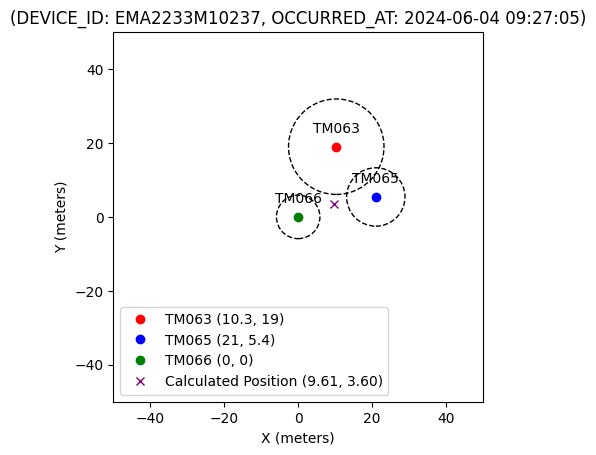

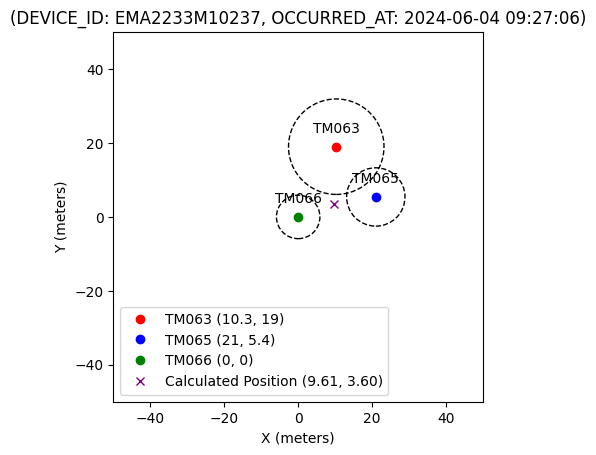

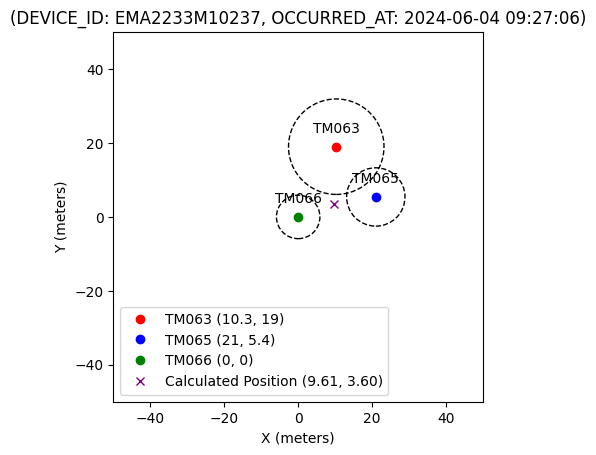

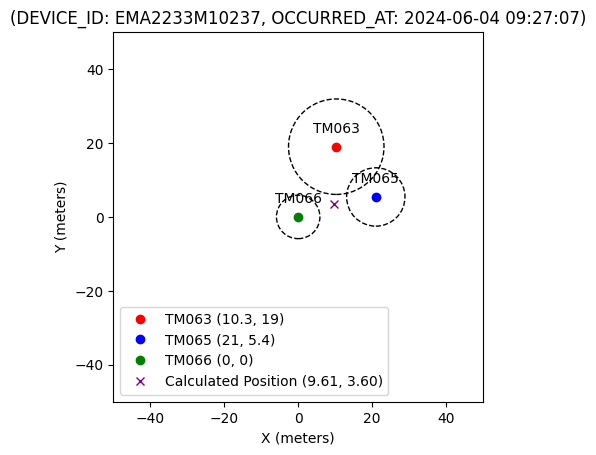

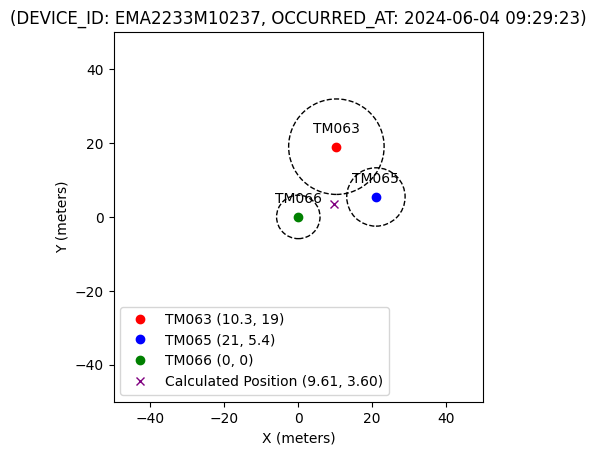

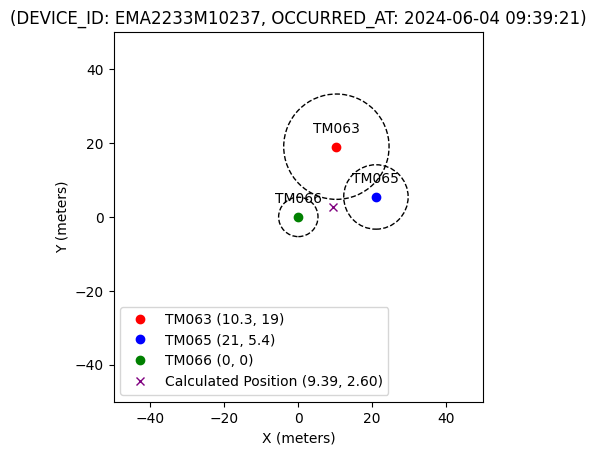

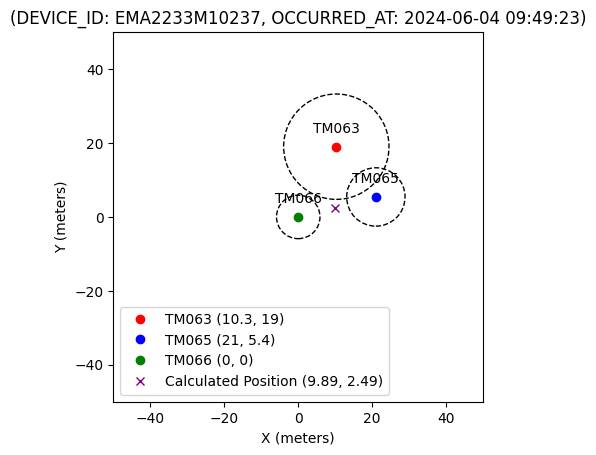

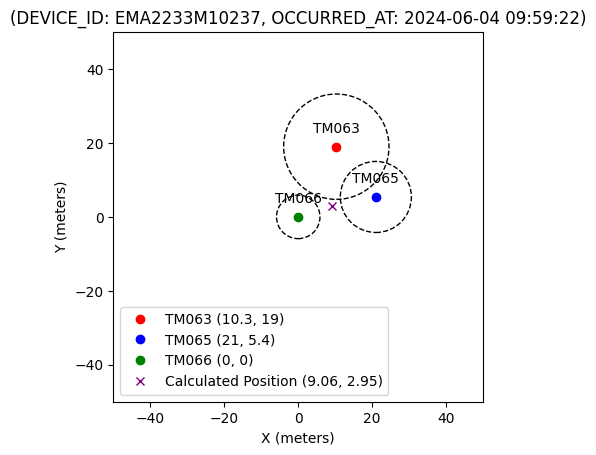

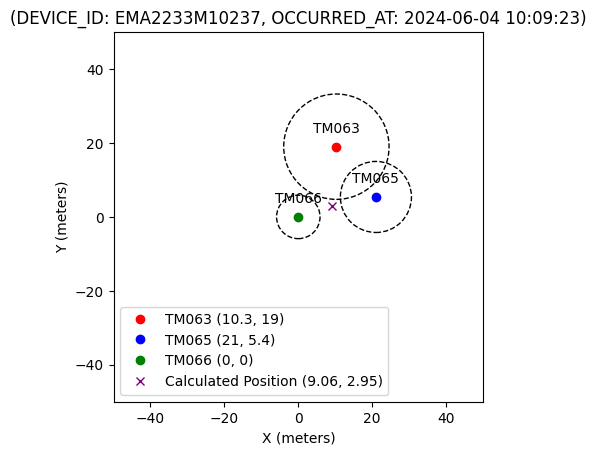

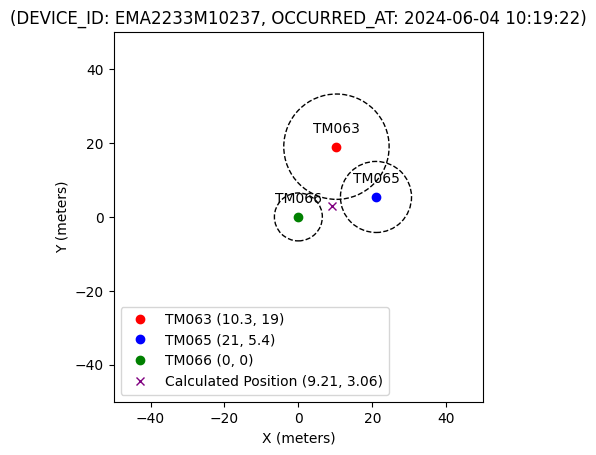

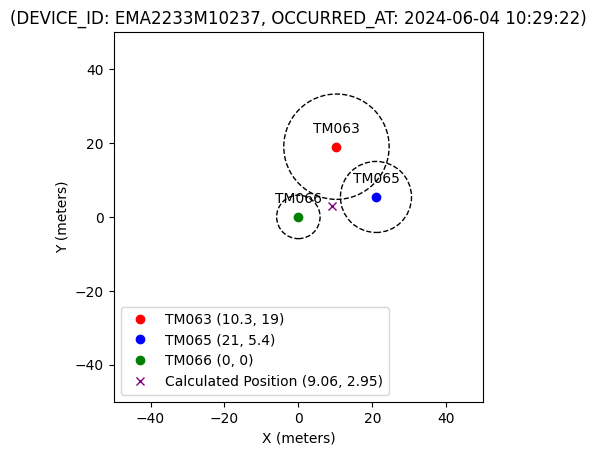

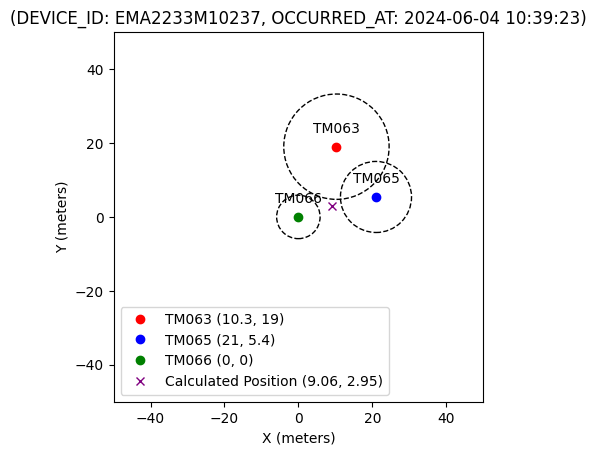

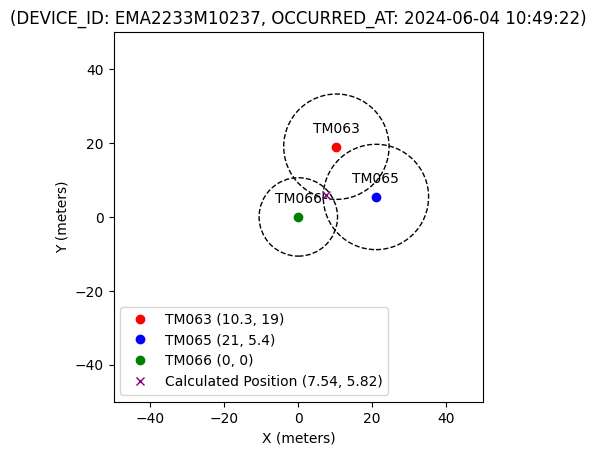

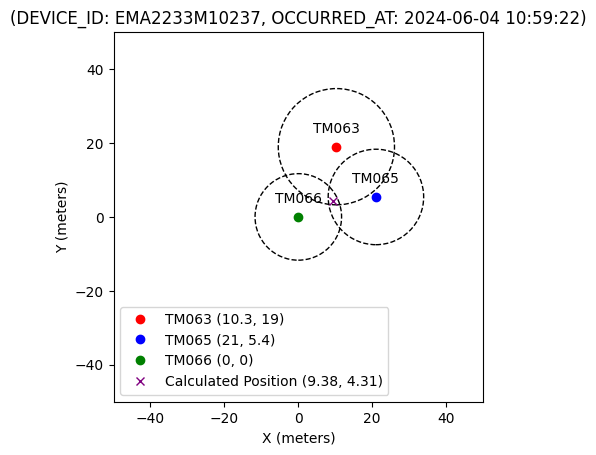

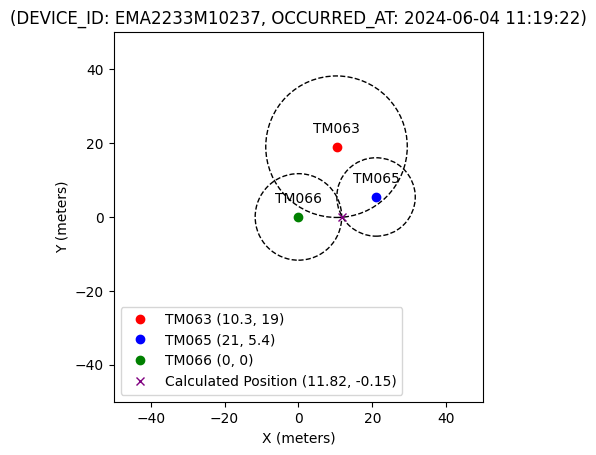

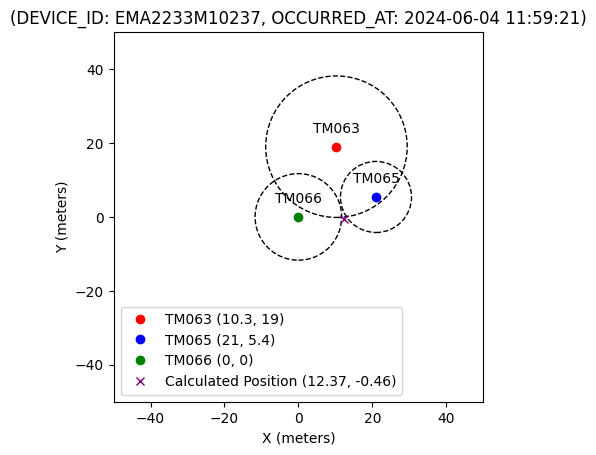

In [14]:
# Function to calculate Euclidean distance between two points
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Iterate through each row, calculate xy-coordinates, and plot them
for idx, row in df.iterrows():
    distances = [row['TM063_Distance'], row['TM065_Distance'], row['TM066_Distance']]
    x, y = calculate_xy_from_distances(distances, list(TM_coordinates_meters.values()))
    df.loc[idx, 'X_Coordinate'] = x
    df.loc[idx, 'Y_Coordinate'] = y

    # # Calculate error
    # real_coordinates = (21, -6.1)
    calculated_coordinates = (x, y)
    # error = calculate_distance(real_coordinates, calculated_coordinates)

    # Print error
    # print(f"Error for row {idx}: {error:.2f} meters")

    # Create a new plot for each row
    fig, ax = plt.subplots()

    # Plot TM063
    ax.plot(*TM_coordinates_meters['TM063'], 'ro', label=f"TM063 {TM_coordinates_meters['TM063']}")

    # Plot TM065
    ax.plot(*TM_coordinates_meters['TM065'], 'bo', label=f"TM065 {TM_coordinates_meters['TM065']}")

    # Plot TM066
    ax.plot(*TM_coordinates_meters['TM066'], 'go', label=f"TM066 {TM_coordinates_meters['TM066']}")

    # Plot the calculated coordinates
    ax.plot(x, y, 'x', color='purple', label=f"Calculated Position ({x:.2f}, {y:.2f})")

    # Plot the real coordinates as a brown filled point
    # ax.plot(*real_coordinates, 'o', color='brown', label=f"Real Position ({real_coordinates[0]:.2f}, {real_coordinates[1]:.2f})", markersize=8)

     # Plot circles with calculated distances
    for tm, (x_tm, y_tm) in TM_coordinates_meters.items():
        distance = row[f'{tm}_Distance']
        circle = plt.Circle((x_tm, y_tm), distance, fill=False, color='black', linestyle='--')
        ax.add_artist(circle)
        ax.annotate(f'{tm}', (x_tm, y_tm), textcoords="offset points", xytext=(0,10), ha='center')

    # Set plot limits
    ax.set_xlim(-50, 50)  # Adjusted limits for meters
    ax.set_ylim(-50, 50)  # Adjusted limits for meters

    # Set labels and legend
    ax.set_xlabel('X (meters)')
    ax.set_ylabel('Y (meters)')
    ax.set_title(f"(DEVICE_ID: {row['DEVICE_ID']}, OCCURRED_AT: {row['OCCURRED_AT']})")
    ax.legend()

    # Show plot
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [15]:
# Extract unique DEVICE_IDs
device_ids = df['DEVICE_ID'].unique()

for device_id in device_ids:
    # Filter dataframe for each DEVICE_ID
    df_device = df[df['DEVICE_ID'] == device_id]

    df['Y_Coordinate']=df['Y_Coordinate'].mean()
    df['X_Coordinate']=df['X_Coordinate'].mean()
df

,ID,OCCURRED_AT,DEVICE_ID,DATA,BROKER_ID,RSSI,TM066_RSSI,TM065_RSSI,TM063_RSSI,TM066_Distance,TM065_Distance,TM063_Distance,X_Coordinate,Y_Coordinate
46,863659,2024-06-04 09:27:05,EMA2233M10237,SN=8375/HDATA/20240604091921/20240604092707/00...,EM-PL-TM066,"20240604074302/TM066,-48_TM065,-51_TM063,-56",-48.0,-51.0,-56.0,5.878016,7.896523,12.915497,9.616393,2.967596
47,863660,2024-06-04 09:27:06,EMA2233M10237,SN=8373/CDATA/20240604084921/20240604085603/00...,EM-PL-TM066,"20240604074302/TM066,-48_TM065,-51_TM063,-56/",-48.0,-51.0,-56.0,5.878016,7.896523,12.915497,9.616393,2.967596
48,863662,2024-06-04 09:27:06,EMA2233M10237,SN=8374/CDATA/20240604085921/20240604090828/00...,EM-PL-TM066,"20240604074302/TM066,-48_TM065,-51_TM063,-56/",-48.0,-51.0,-56.0,5.878016,7.896523,12.915497,9.616393,2.967596
49,863663,2024-06-04 09:27:07,EMA2233M10237,SN=8375/CDATA/20240604090921/20240604091037/00...,EM-PL-TM066,"20240604074302/TM066,-48_TM065,-51_TM063,-56/",-48.0,-51.0,-56.0,5.878016,7.896523,12.915497,9.616393,2.967596
50,863670,2024-06-04 09:29:23,EMA2233M10237,SN=8376/CDATA/20240604091921/20240604092919/00...,EM-PL-TM066,"20240604092921/TM066,-48_TM065,-51_TM063,-56/",-48.0,-51.0,-56.0,5.878016,7.896523,12.915497,9.616393,2.967596
51,863677,2024-06-04 09:39:21,EMA2233M10237,SN=8377/CDATA/20240604092921/20240604093554/00...,EM-PL-TM066,"20240604093921/TM066,-47_TM065,-52_TM063,-57/",-47.0,-52.0,-57.0,5.327160,8.713065,14.251027,9.616393,2.967596
52,863685,2024-06-04 09:49:23,EMA2233M10237,SN=8378/CDATA/20240604093921/20240604094542/00...,EM-PL-TM066,"20240604094921/TM066,-48_TM065,-51_TM063,-57/",-48.0,-51.0,-57.0,5.878016,7.896523,14.251027,9.616393,2.967596
53,863693,2024-06-04 09:59:22,EMA2233M10237,SN=8379/CDATA/20240604094921/20240604095451/00...,EM-PL-TM066,"20240604095921/TM066,-48_TM065,-53_TM063,-57/",-48.0,-53.0,-57.0,5.878016,9.614041,14.251027,9.616393,2.967596
54,863700,2024-06-04 10:09:23,EMA2233M10237,SN=8380/CDATA/20240604095921/20240604100034/00...,EM-PL-TM066,"20240604100921/TM066,-48_TM065,-53_TM063,-57/",-48.0,-53.0,-57.0,5.878016,9.614041,14.251027,9.616393,2.967596
55,863708,2024-06-04 10:19:22,EMA2233M10237,SN=8381/CDATA/20240604100921/20240604101446/00...,EM-PL-TM066,"20240604101921/TM066,-49_TM065,-53_TM063,-57/",-49.0,-53.0,-57.0,6.485834,9.614041,14.251027,9.616393,2.967596
